In [1]:
%matplotlib inline

import tile
import main
import pandas
import geopandas
import matplotlib
import shapely.geometry

In [5]:
# While fiddling with the tile.py and main.py source use this to reload
import importlib
importlib.reload(tile)
importlib.reload(main)

<module 'main' from '/home/osullid3/Documents/code/tiling-space/main.py'>

## Test by generating multiple patterns
Enable the next code block to test

In [73]:
# main.main()

## Test model example
This makes 3.4.6 tiling

In [6]:
BLUE = 0x477984
ORANGE = 0xEEAA4D
RED = 0xC03C44

model = tile.Model()
model.append(tile.Shape(6, fill = BLUE))
a = model.add(0, range(6), 4, fill = RED)
b = model.add(a, 1, 3, fill = ORANGE)
c = model.add(a, 2, 6, fill = BLUE)
model.repeat(c)
model.render(show_labels = True).write_to_png("test.png")

In [7]:
fills = [s.fill for s in model.lookup.values()]
df = pandas.DataFrame(data = {"fill": fills})
geoms = [shapely.geometry.Polygon(s.points()) for s in model.lookup.values()]
tiles = geopandas.GeoDataFrame(df, geometry = geoms)

<AxesSubplot:>

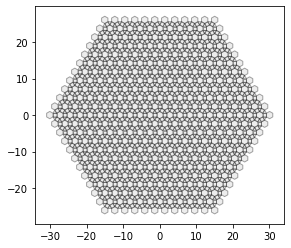

In [8]:
tiles.plot(facecolor = "#cccccc", edgecolor = 'k', alpha = 0.35)

In [9]:
tiles.to_file("tiles.gpkg", driver = "GPKG")